In [54]:
# Initialize Otter
import otter
grader = otter.Notebook("hw9.ipynb")

# Homework 9: Predictive Modelling and Model Comparision

Name: Audra Stump and Sophie Warsetsky

Student ID: 490380 and 486550

Collaborators:


## Instructions

This is the final homework/Project, which is about Understanding Data Profiling, Feature Engineering, Feature Selection, Model Comparision & Selection as a _final project_ for our 217a class.

We will be using the techniques and approaches introduced throughout the course focusing mainly towards the second half of the semester:

* [M0] Python for DS
* [M1] The DS and ML Workflows
* [M2] Exploratory Data Analsyis
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M4] Linear Regression (if applicable - depends on problem/dataset)**
* **[M5] Linear Classification (if applicable - depends on problem/dataset)**
* [M6] Learning Principles and Ethical Thinking for DS
* **[M7] Clustering K-Means (if applicable - depends on problem/dataset)** 
* **[M8] Similarity-based Learning K-NN (if applicable - depends on problem/dataset)**
* **[M9] More Models (Decision Tree, Random Forest, Neural Network) for Feature Engineering & Model Comparision & Selection**
* **[Lecture Discussion session] Creating & Managing Model pipeline for ML workflow**

The main focus of this project is majorly on the last modules [M4]-[M10]. In particular, it will be helpful to review **Lab 4 & hw4 onwards for more clarification**.
Most of the things you will do in this final project are explained in `Lab9-1 and Lab9-2` and `Final Lecture Discussion session with Demo`. Then, review the other labs and hws to recap the general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [55]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our final project this semester, we'll take a look at data for California Housing Price Prediction
https://www.kaggle.com/subashdump/california-housing-price-prediction/data 


As you have seen throughout the semseter we have learned various techniques to solve a problem task (Classification, Regression, Clustering etc.) starting from problem formulation to EDA to model building to model evaluation and performing feaure engineering and selection in order to improve the model's performance.
You will be combining all the knowledge learned so far in this final project. You will be making assuptions and decisions on your own with appropriate justifications in writeups about how to improve the prediction model using all the tools and techniques learned so far and provide the best model at the end.


The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Our goal will be to use this dataset to gain some insight about characteristics of different features.
We will be using data profiling from pandas and create models (hopefully more than 3) and complare them to find out which model performed the best and probably explain why it is the best model among all in this data.


<!-- BEGIN QUESTION -->

### Problem 1.1

Download the data and load it in this notebook for further processing and analysis.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take? what kind of relationship you would explore in this dataset and on what features? 
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

This dataset examines the features of housing in a specific district in California and it was obtained from the 1990 census. It originates from a book, 'Hands on Machine Learning' by Aurélien Géron. It has 10 features with 20640 examples.
The features it includes are:
- longitude and latitude (floats)
- housing median age (integer)
- total rooms (integer)
- total bedrooms (integer)
- population (integer)
- households (integer)
- median income (float)
- median house value (float)
- ocean proximity (float)

We are interested in exploring the relationship between how longitude and latitude affect the median house value and how median income impacts the house value. 

In [56]:
from os.path import exists
#Importing the data into the assigment
data_dir = 'utility/data'
#reading in the data
import pandas as pd
#keeping a copy of the original data before we play with it
dataOld = pd.read_csv(f'{data_dir}/housing.csv')
data = dataOld
#we will examine the head of the data for future analysis
data.head()

# END SOLUTION

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Problem 1.2
### Getting Familiar with the Data

Install the pandas data profile dependencies and import them to generate the data report using __df.profile_report__. 
Hint - Follow the Lecture9Demo for example.


**Write-up!** What is the domain of this dataset and what kind of prediction (regression, classification or clustering) we are doing with this dataset and why? Describe the additional insights (if any) you get from generating the pandas data profile report, which you did not observe in the previous step. Does it change your and thinking process or provide any ideas about data pre-processing or processing steps? 

In [57]:
#importing pandas and getting a data profile reports
import pandas as pd
import pandas_profiling


pr = data.profile_report()
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The domain of this dataset (maximum and minimum of the dataset) depends on the different features. 
- Longitude: -124.35 to -114.31
- Latitude: 32.54 to 41.95
- Total Rooms: 2 to 39320
- Total Bedrooms: 1 to 6445
- Median Age: 1 to 52
- Population: 3 to 35682 people
- Households: 1 to 6082 
- Median Income: 0.4999 to 15.0001 (in 10k USD)
- Median Household Value: 14999 to 500001 USD
- Ocean Proximity: <1H Ocean, Inland, Near Ocean, Near Bay, and Island

We will use regression since we are trying to determine the median household value because our features that we are examining are numerical and continuous. Although there is a categorical feature, the majority of the data is in numerical features. We can encode this categorical feature, Ocean Proximity, into a numerical feature to examine the relationship between it and the median household value. 

Insights:  
- Latitude and longitude were highly correlated

This is a given, however we may be able to use this to generate a combined superscore of the latitude and longitude data and compare that to the median income. 
- Total rooms and total bedrooms were highly correlated

If these are highly correlated, then we might be able to also combine these two features into one feature. 
- Median house value was highly correlated with Median income

This gives us some indication of a feature to look out for when examining what affects median income. 
- Total bedrooms was the only feature with missing values

We will need to examine this feature and drop NaN values 

In [58]:
#importing everything from Numpy
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Problem 1.3: Data Description and Pre-processing

**Write-up!** What are the major highlights and interesting points in the report generated in the previous cell (or your own EDA process). 
Describe your insights and thought process regarding those interested aspects of the data/features/graph/statistics in terms of general relationship among features such as correlation, interaction, cardinality, distribution, missing data etc.


We found it interesting that the data that had the most missing variables was the total bedrooms. This is important to consider when determining which data columns to replace NaN values with the mean. Additionally, other insights that stuck out included the correlation between [population and total rooms](#1), and the correlation between [median house value and median income](#2). 

<a id="1">Population and Total Rooms</a>

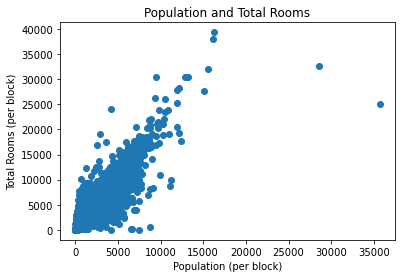

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.scatter(data['population'],data['total_rooms'])
plt.title("Population and Total Rooms")
plt.xlabel("Population (per block)")
plt.ylabel("Total Rooms (per block)")
plt.show()


<a id="2">Median House Value and Median Income</a>

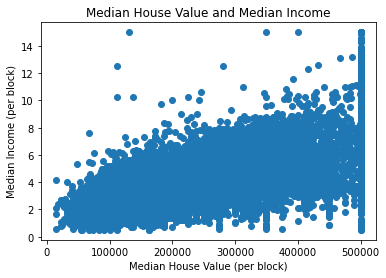

In [60]:
plt.scatter(data['median_house_value'],data['median_income'])
plt.title("Median House Value and Median Income")
plt.xlabel("Median House Value (per block)")
plt.ylabel("Median Income (per block)")
plt.show()

### Problem 1.4: Split the Data (you will be using the same data split (train-validation-test) for all the models in the following questions )

Extract input (X) and output (y) data from the dataset. 

Use the train and test split and k-fold cross validation (use 5 fold cross validation) from the scikit learn library to split the data into 80% training and 20% testing.

**NOTE** Remember that you will be using the same cross validation and train test splits values for all the predictive modeling part (Problem 3) for the fair comparision at the end. 

**NOTE** We are **not** doing any feature engineering yet here, just making a baseline model to compare to!

In order to be able to perform linear regression, we will do a rough cleaning of the data. For one, we need to drop the ocean proximity column since it is categorical, and we also need to drop any NaN values. 

In [61]:
#now we will temporarily drop the ocean proximity data since it is not categorical
data = data.drop('ocean_proximity', axis=1)
#we will also temporarily remove null values
data = data.dropna()


We want to set the X value equal to the features we want to examine, everything besides the median house value, and the y value equal to the target variable, which is the median house value. 

In [62]:
X = data.loc[:, data.columns !='median_house_value']
y = data['median_house_value']

We will now create our testing and training splits with a 80/20 split and a random state of 6. We will use cross validation and enumerate over the training and validation indices 

In [63]:
#We are now creating our testing and training split with a 80/20 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
#We will use five splits in our KFold validation set
kf = KFold(n_splits = 5)

#enumerate over trianing index and validation index and printing them out
for fold, (train_idx, validation_idx) in enumerate(kf.split(data)): 
    print(fold)
    print(train_idx)
    print(validation_idx)

0
[ 4087  4088  4089 ... 20430 20431 20432]
[   0    1    2 ... 4084 4085 4086]
1
[    0     1     2 ... 20430 20431 20432]
[4087 4088 4089 ... 8171 8172 8173]
2
[    0     1     2 ... 20430 20431 20432]
[ 8174  8175  8176 ... 12258 12259 12260]
3
[    0     1     2 ... 20430 20431 20432]
[12261 12262 12263 ... 16344 16345 16346]
4
[    0     1     2 ... 16344 16345 16346]
[16347 16348 16349 ... 20430 20431 20432]


### Problem 1.5: Perform Linear Regression

Let's create a baseline model here:

Perform Linear Regression on training data. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) from Linear Regression for test data set. Note that we are still **not** doing any feature engineering yet!



In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#setting the average linear regression to zero to get a base value
avgr2_lin_regression = 0
#creating our kfold model with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=5)
#iterating through each fold
for fold, (train_idx, validation_idx) in enumerate(kf.split(X_train)): 
    #creating a linear regression model 
    model = LinearRegression()
    #fitting the model to the training data
    model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    #using the validation index to create our predictions for y
    y_pred = model.predict(X_train.iloc[validation_idx])
    #using the y predictions to get the r2 score of our model and adding it to a running sum
    avgr2_lin_regression += model.score(X_test, y_test)
print("average R2 with cross validation: ")
#for five folds, we need to divide this running sum by 5
avgr2_lin_regression = avgr2_lin_regression/5
print(avgr2_lin_regression)


average R2 with cross validation: 
0.621245493762244


## 2. Feature Engineering

### Problem 2.1 

Identify features which needs feature engineering after looking at the baseline model's result. Perform Feature Tranformation/Manipulation/Engineering in this step and use this knowledge in predictive modeling part. 

Apply some feature generation technices in order to make those features more useful for the data such as checking the datatypes, handling missing values, extracting new features from existing ones, encoding some features if categorical, scaling, standardization etc. 

**Write up!** Explain your reasoning for selecting features and performing those specific feature engineering steps respectively.

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

We will now import the tools we need to use and set our data back to the original set

In [65]:
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
#because we changed the dataset 'data' and got rid of the ocean_distance feature entirely, we will
#revert the dataset back to the original
data = dataOld

We will now encode our categorical ocean column into numerical values

In [66]:
#Creating a scale mapper 
scale_mapper = {"<1H OCEAN":1, "INLAND":2, "NEAR OCEAN":3, "NEAR BAY":4, "ISLAND":5}
#Replacing the ocean proximity column with our encoded values
data["ocean_proximity"] = data["ocean_proximity"].replace(scale_mapper)


Now we will replace our empty values in each column with our average values for each column

In [67]:
#calculating mean
avg_bedroom = data["total_bedrooms"].mean()
#replacing the empty values with the mean 
data['total_bedrooms'].fillna(avg_bedroom,inplace=True)
#finding the mean total rooms
avg_room = data["total_rooms"].mean()
#replacing the empty values with the mean total rooms
data['total_rooms'].fillna(avg_room,inplace=True)


Normalizing the training and test data with standard scaler 

In [68]:
   
    normalized_X_train = pd.DataFrame(
    StandardScaler().fit_transform(X_train),
    columns = X_train.columns)
    normalized_X_test = pd.DataFrame(
    StandardScaler().fit_transform(X_test),
    columns = X_test.columns
)
X_train = normalized_X_train
X_test = normalized_X_test


### Problem 2.2: Perform Basic Feature Manupilation & Data Transformation

1. Be consistent with the feature engineering process in train and test data. No data snooping.
2. Handle Missing data: Fill the missing values with the mean of the respective column.
3. Encode categorical data: Convert categorical column in the dataset to numerical data.
4. Standardize data: Standardize training and test datasets.

### Problem 2.3: Perform Feature Engineering (Feature Selection or/and Feature Generation) including but not limited to statistical, ML based, Newly extracted/created features etc. wherever appropriate/applicable in the respective Predictive Modeling part.


We did these steps in 2.1

We are now going to calculate the importance of our features

Feature: 0, Score: -84157.49391
Feature: 1, Score: -89286.41500
Feature: 2, Score: 15066.96337
Feature: 3, Score: -19475.53734
Feature: 4, Score: 50241.36104
Feature: 5, Score: -42472.52127
Feature: 6, Score: 16671.04469
Feature: 7, Score: 77354.64896


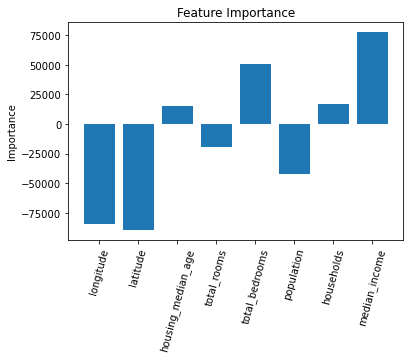

In [69]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# defining a Linear Regression model
model = LinearRegression()
# fitting with our training data
model.fit(X_train, y_train)
# retrieving the importance of our model
importance = model.coef_
# printing the importance of the model
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plotting the feature importance 
x = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
             'households','median_income']
plt.bar(x, importance)
plt.xticks(rotation=75)
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()


## 3. Predictive Modeling [Using scikit learn pipeline is highly encouraged]

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

Remember to use cross-validation and all of our other best practices from HW8, Lab 8 and Lab 9!

### Problem 3.1 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression on the training data.

Predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from K-Nearest Neighbors Regression on the test datset.

In [70]:
from sklearn.neighbors import KNeighborsRegressor
#This function will perfor the K Nearest Neighbors Regression
def knn_kfolds(X, y, n_folds, n_neighbors, random_state=None):
    #Using the variable total, we will keep track of the running sum of R2 scores per each Kfold fold
    total  = 0;
    #Creating our KFold model based on the parameters passed in
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    #for each fold, we will enumerate through
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        #Collecting the training and testing data for the X and Y values 
        XTrain1, XTest1 = X.iloc[train_idx], X.iloc[test_idx]
        yTrain1, yTest1 = y.iloc[train_idx], y.iloc[test_idx]
        #preprocessing, scaling, and fitting the scaler model
        scaler = preprocessing.StandardScaler().fit(XTrain1)
        #transforming the model using the X training and testing data
        XTrain1 = scaler.transform(XTrain1)  
        XTest1 = scaler.transform(XTest1) 
        #using the KNeighborsRegressor package we imported, we create a K nearest neighbors model with the parameters
        #specified
        model = KNeighborsRegressor(n_neighbors)
        #fitting the model to our training and testing data
        model.fit(XTrain1, yTrain1)
        #adding the model score to our running sum 
        total+= model.score(X = XTest1, y = yTest1)
    #since we iterated through all the folds, we will use the number of folds as a denominator for our running 
    #sum of r2 values 
    avg_score = total / n_folds
    return avg_score

In [71]:
#We wish to use knn_kfolds with 5 nearest neighbors 
r2_knn_kfolds = knn_kfolds(X_train, y_train, 5, 3, random_state=10)
print("R2 value for k nearest neighbors: ")
r2_knn_kfolds

R2 value for k nearest neighbors: 


0.6867248698598383

### Problem 3.2 : Perform Decision Tree Regression 
Perform Decision Tree Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from Decision Tree Regression on the test dataset.

In [72]:
from sklearn.tree import DecisionTreeRegressor 
avg_decision_tree = 0
kf = KFold(n_splits=5, shuffle=True, random_state=5)
for fold, (train_idx, validation_idx) in enumerate(kf.split(X_train)): 
    # creating our regressor object
    regressor = DecisionTreeRegressor(random_state = 0)  
    # fitting our regressor object with the training data
    regressor.fit(X_train, y_train)
    #making predictions based on the testing data
    y_pred = regressor.predict(X_test)
    #scoring the model with the testing data
    avg_decision_tree += regressor.score(X_test, y_test)
r2_decision_tree = avg_decision_tree/5
print("Decision tree R2: ")
print(r2_decision_tree)


Decision tree R2: 
0.6194586877970165


### Problem 3.3 : Perform Random Forest Regression :
Perform Random Forest Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from Random Forest Regression on the test dataset.

In [73]:
from sklearn.ensemble import RandomForestRegressor
avg_forest = 0
kf = KFold(n_splits=5, shuffle=True, random_state=5)
for fold, (train_idx, validation_idx) in enumerate(kf.split(X_train)): 
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 4)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    avg_forest += model.score(X_test, y_test)
avg_forest = avg_forest/5
print("R squared value: ")
print(avg_forest)




R squared value: 
0.6231503054524425


### Problem 3.4: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Compare the results of the baseline model with this model's result.

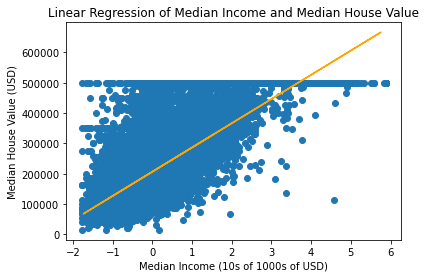

R2: 
0.46164914257703327


In [74]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#creating a linear regression model
model = LinearRegression()
#extracting the column of interest
med_income = X_train['median_income']
#reshaping and fitting our model
med_income = med_income.values.reshape(-1,1)
model.fit(med_income, y_train)
med_inc_test = X_test['median_income']
med_inc_test = med_inc_test.values.reshape(-1,1)
y_pred = model.predict(med_inc_test)


med_inc_test = med_inc_test.reshape(-1,1)
#plotting the linear regression model
plt.scatter(med_income,y_train)
plt.plot(med_inc_test,y_pred, color = 'orange')
plt.xlabel("Median Income (10s of 1000s of USD)")
plt.ylabel("Median House Value (USD)")
plt.title("Linear Regression of Median Income and Median House Value")
plt.show()
#determining the r2 score 
r2_lin_reg_med_income = model.score(med_inc_test, y_test)

print("R2: ")
print(r2_lin_reg_med_income)


## 4. Model Comparision

### Problem 4.1:

Compare all the models results and report the lowest accuracy score.

Visualize all the final models error analysis (RMSE) or R^2 (Use either one but be consistent for all the models) in a bar graph.

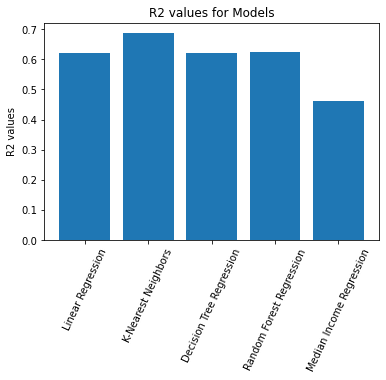

In [75]:
#creating our x and y variables, x being the features and y being the r2 values
x = ["Linear Regression", "K-Nearest Neighbors", "Decision Tree Regression", "Random Forest Regression", "Median Income Regression"]
y = [avgr2_lin_regression, r2_knn_kfolds,r2_decision_tree,avg_forest,r2_lin_reg_med_income]
#plotting the graph
plt.bar(x,y)
plt.title("R2 values for Models")
plt.ylabel("R2 values")
plt.xticks(rotation = 65)
plt.show()

### Problem 4.2:

Now review the feature enginnering lab (lab 9-1 and lab 9-2) and apply one of the feature selection and/or one feature generation method and use it for prediction on the test data. Evaluate and compare the all the models (LR, DT, RF, K-NN) on original features (no feature engineering) with the ones on the engineered features.
Then, select the best model after the whole comparision.

**Write up** Explain which feature selection and/or one feature generation method have you selected and why for this dataset.

In [76]:
#importing everything 
import sklearn 
import scipy
import warnings
from sklearn.linear_model import LogisticRegression

In [77]:
#creating our validation set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=6, test_size=0.2)

In [78]:
from sklearn.ensemble import RandomForestRegressor
#creatomg our random forest regressor model 
model = RandomForestRegressor(n_estimators=10, random_state=28, max_depth=5)
model.fit(X_train, y_train)
#calculating the importance 
importance = model.feature_importances_

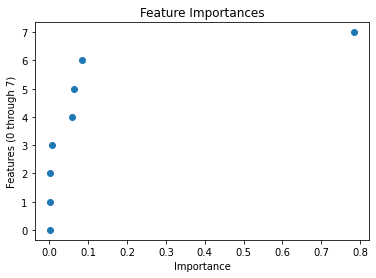

In [79]:
#plotting our imortances 
plt.scatter(np.sort(importance),np.arange(importance.shape[0]))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features (0 through 7)")
plt.show()

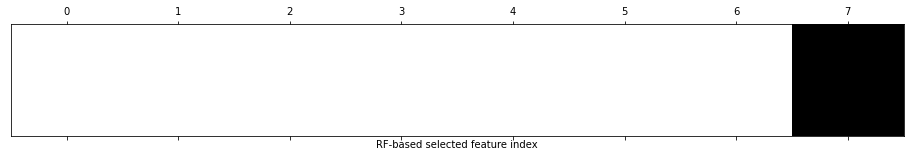

In [80]:
#creating our housing mask using the importance
mask_housing = importance>np.quantile(importance, 0.97)
plt.matshow(mask_housing.reshape(1, -1), cmap='gray_r')
plt.xlabel("RF-based selected feature index")
plt.yticks(())
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
#using a linear regression model, we will fit it using our X and y training data and then determine a composite
#r2 score 
all_model = LinearRegression()
all_model.fit(X_train, y_train)
print(f'R_squared score for all features: {all_model.score(X_val, y_val):0.4f}')

R_squared score for all features: 0.6401


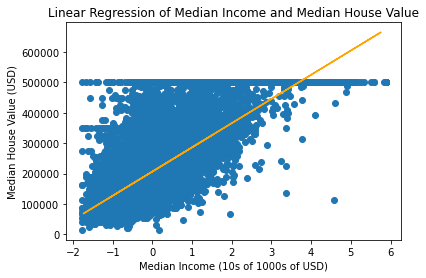

R2: 
0.461693228099189


In [82]:
#creating a linear regression model
model = LinearRegression()
#extracting our median income column fro the X_training set
med_income = X_train['median_income']
#reshaping the values and fitting the model
med_income = med_income.values.reshape(-1,1)
model.fit(med_income, y_train)
med_inc_test = X_test['median_income']
med_inc_test = med_inc_test.values.reshape(-1,1)
#making our predictions based on the model
y_pred = model.predict(med_inc_test)


med_inc_test = med_inc_test.reshape(-1,1)
#plotting our graph
plt.scatter(med_income,y_train)
plt.plot(med_inc_test,y_pred, color = 'orange')
plt.xlabel("Median Income (10s of 1000s of USD)")
plt.ylabel("Median House Value (USD)")
plt.title("Linear Regression of Median Income and Median House Value")
plt.show()
#determining our final r2 value
r2_lin_reg_med_income = model.score(med_inc_test, y_test)

print("R2: ")
print(r2_lin_reg_med_income)



**Write up** Summarize your results and provide some crucial insights about the entire with and without feature engineering process such as which model performed the best and why, based on what metrics and indicators, etc. Which feature engireeing step provided more value to the predictive modeling process?


Based on our feature engineering, we decided that the median income feature would be the median income feature would be most predictive of median household value. However, when just comparing a linear regression model of median income versus median house value versus our other models, this hypothesis was debunked. The R2 for performing linear regression on the median income and median house value was less than the R2 for our other models. The model with the highest R2 was the K-nearest neighbors model. The feature engineering step that was most valuable to the predictive modeling process was calculating the importance via a RF based selective feature index because this showed us which feature had the most predictive power. This feature was the median income and had a strong correlation with the median house value, however it alone was not able to predict the median house value as well as the combined other features did. 

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

Note that Otter is not being used for this assignment, but is still configured for Gradescope purposes.

In [84]:
grader.check("hw9")

hw9 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [85]:
grader.check_all()

hw9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [88]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)